Data Cleaning and Imputation (contd..)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [7]:
df = pd.read_csv('data/products_data.csv')
df

,Product_ID,Product_Name,Category,Price,Stock,Rating,Launch_Date
0,101,Smart TV,Electronics,500.0,25.0,4.5,2021-05-15
1,102,Laptop,Electronics,NaN,15.0,4.7,2021-03-10
2,103,Sofa,Furniture,300.0,30.0,NaN,2020-11-20
3,104,Coffee Maker,Kitchen,150.0,50.0,4.2,2021-01-25
4,105,Smart TV,Electronics,500.0,25.0,4.5,2021-05-15
5,106,Office Chair,Furniture,200.0,20.0,4.0,2022-02-05
6,107,Desk,Furniture,NaN,10.0,4.3,2019-06-30
7,108,Phone,Electronics,400.0,NaN,4.3,2022-03-12


In [10]:
imputer = KNNImputer(n_neighbors=3)
imputed_data = pd.DataFrame(
    imputer.fit_transform(df[["Product_ID", "Price", "Stock", "Rating"]]),
    columns=["Product_ID", "Price", "Stock", "Rating"]
)
imputed_data

,Product_ID,Price,Stock,Rating
0,101.0,500.000000,25.000000,4.500000
1,102.0,366.666667,15.000000,4.700000
2,103.0,300.000000,30.000000,4.333333
3,104.0,150.000000,50.000000,4.200000
4,105.0,500.000000,25.000000,4.500000
5,106.0,200.000000,20.000000,4.000000
6,107.0,366.666667,10.000000,4.300000
7,108.0,400.000000,16.666667,4.300000


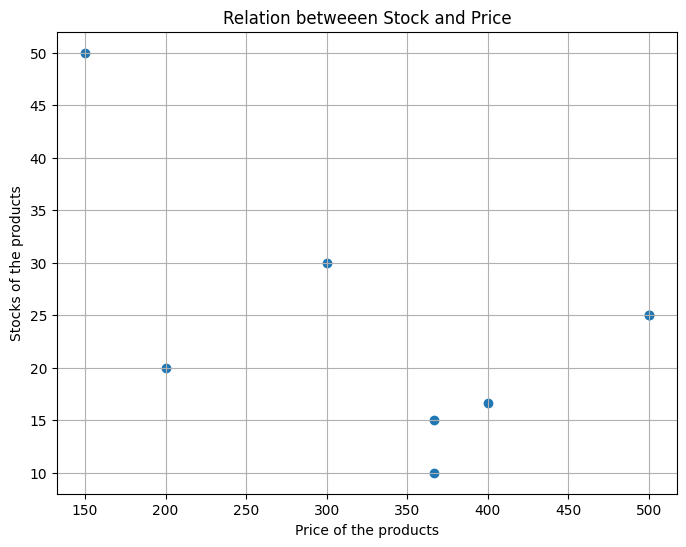

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(x=imputed_data['Price'], y=imputed_data['Stock'])
plt.title('Relation betweeen Stock and Price')
plt.xlabel('Price of the products')
plt.ylabel('Stocks of the products')
plt.grid()
plt.show()

In [19]:
df['Stock'].describe()

count     7.000000
mean     25.000000
std      12.909944
min      10.000000
25%      17.500000
50%      25.000000
75%      27.500000
max      50.000000
Name: Stock, dtype: float64

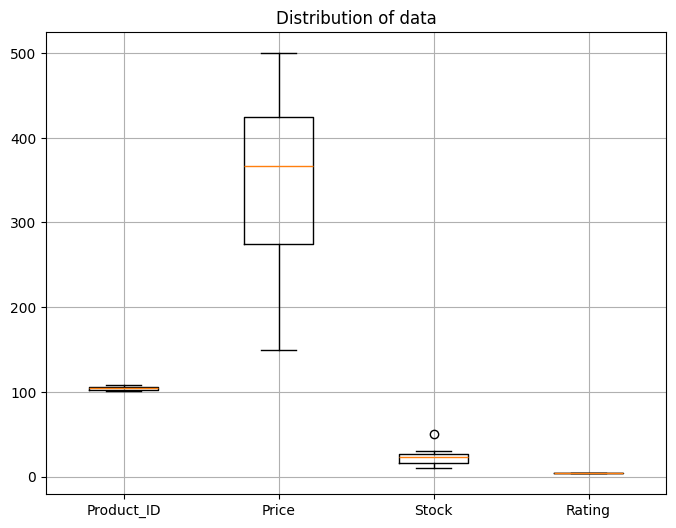

In [18]:
plt.figure(figsize=(8, 6))
plt.boxplot(imputed_data, labels=["Product_ID", "Price", "Stock", "Rating"])
plt.title("Distribution of data")
plt.grid()
plt.show()

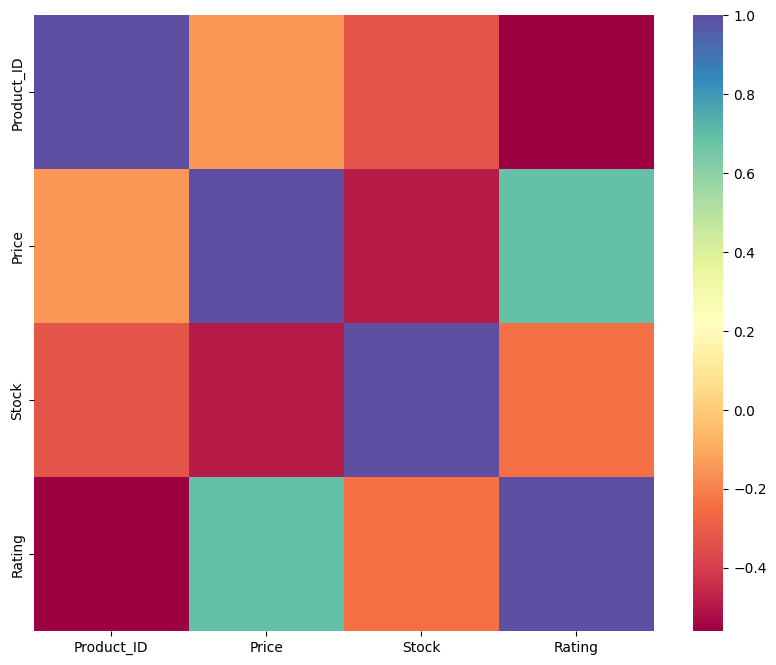

In [33]:
correlation = imputed_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,cmap='Spectral')
plt.show()

In [43]:
correlation

,Product_ID,Price,Stock,Rating
Product_ID,1.000000,-0.149169,-0.327690,-0.561258
Price,-0.149169,1.000000,-0.488677,0.690880
Stock,-0.327690,-0.488677,1.000000,-0.238721
Rating,-0.561258,0.690880,-0.238721,1.000000


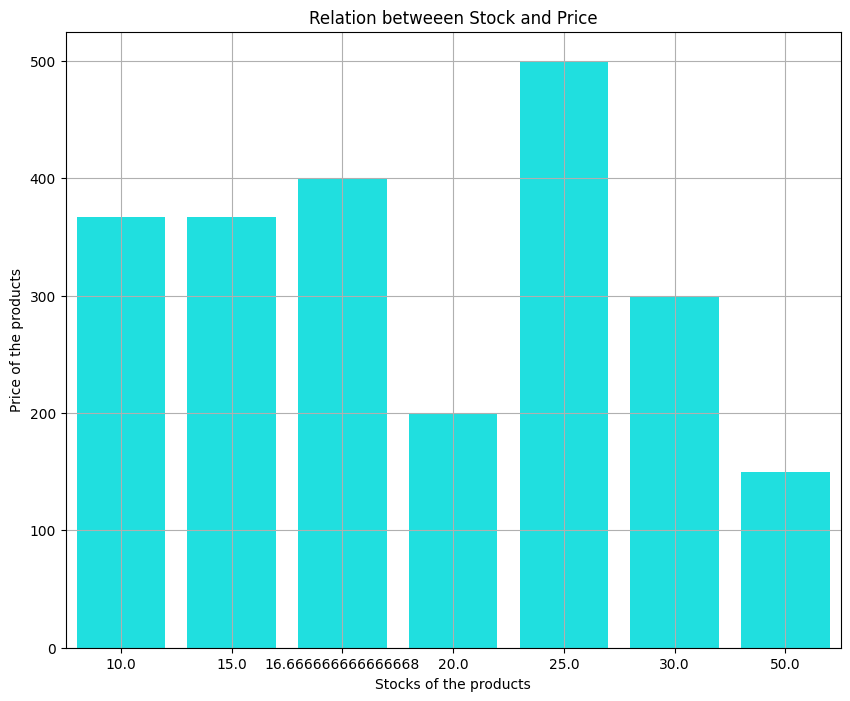

In [34]:
plt.figure(figsize=(10, 8))
sns.barplot(y=imputed_data["Price"], x=imputed_data["Stock"],color='cyan')
plt.title("Relation betweeen Stock and Price")
plt.xlabel("Stocks of the products")
plt.ylabel("Price of the products")
plt.grid()
plt.show()

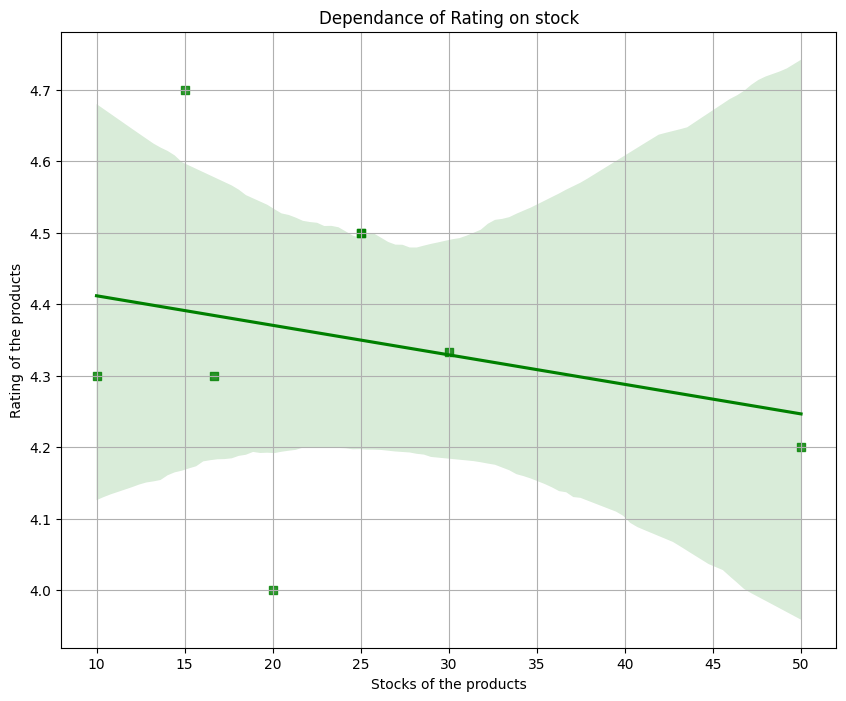

In [41]:
plt.figure(figsize=(10, 8))
sns.regplot(y=imputed_data["Rating"], x=imputed_data["Stock"], color="green",marker='s')
plt.title("Dependance of Rating on stock")
plt.xlabel("Stocks of the products")
plt.ylabel("Rating of the products")
plt.grid()
plt.show()

<Figure size 1000x800 with 0 Axes>

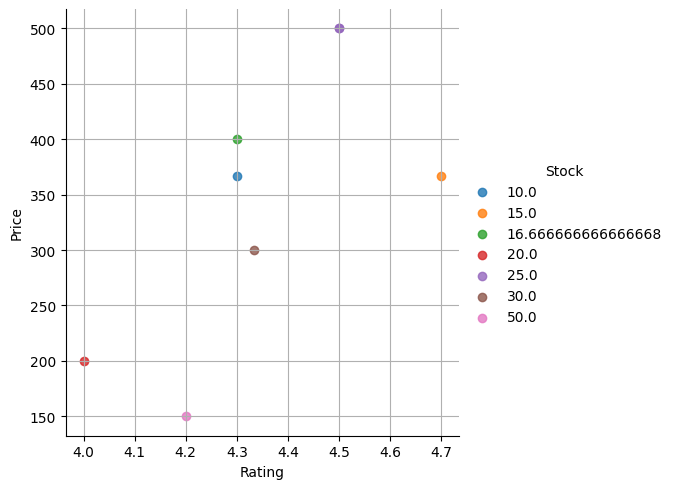

In [42]:
plt.figure(figsize=(10, 8))
sns.lmplot(x='Rating',y='Price',hue='Stock', data=imputed_data)
plt.grid()
plt.show()